## Question 5: Process Mining (22pts)

In [14]:
import pandas as pd
import pm4py

In [15]:
from pm4py.statistics.traces.generic.log import case_statistics

In [16]:
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay

In [17]:
import matplotlib.pyplot as plt

### a) Loading the Data and Basic Statistics (9pts)

#### **a(i)** 
Load the data **reimburse.csv** and create a PM4Py event log. In doing so, use the following column mapping:
 - *Activity* is the activity key
 - *CaseId* is the case ID
 - *Timestamp* is the timestamp

In [18]:
# your code
dataframe = pd.read_csv('datasets/reimburse.csv', sep=',')
dataframe = pm4py.format_dataframe(dataframe, case_id='CaseId', activity_key='Activity', timestamp_key='Timestamp')
event_log = pm4py.convert_to_event_log(dataframe)
dataframe.tail()


,Timestamp,CaseId,Activity,ModelTime,Resource,Brand,case:concept:name,concept:name,time:timestamp,@@index
47825,2022-03-02 15:20:38+00:00,9998,Fill Fraud Report,55246838,20,CP,9998,Fill Fraud Report,2022-03-02 15:20:38+00:00,47825
47826,2022-02-05 20:00:11+00:00,9999,Online,53103611,111,CP,9999,Online,2022-02-05 20:00:11+00:00,47826
47827,2022-02-14 10:23:19+00:00,9999,Register Low,53846599,2,CP,9999,Register Low,2022-02-14 10:23:19+00:00,47827
47828,2022-02-14 11:11:08+00:00,9999,Ask if Reimbursement,53849468,1,CP,9999,Ask if Reimbursement,2022-02-14 11:11:08+00:00,47828
47829,2022-02-16 11:56:24+00:00,9999,Pay,54024984,2,CP,9999,Pay,2022-02-16 11:56:24+00:00,47829


#### **a(ii)** 
Compute and print the following basic information:
- Number of events
- Number of cases
- Earliest timestamp
- Latest timestamp
- Number of trace variants

In [19]:
# your code
num_events = len(pm4py.get_event_attribute_values(event_log,'@@index'))
num_cases = len(pm4py.get_event_attribute_values(event_log,'CaseId'))
time_min = dataframe['time:timestamp'].min()
time_max = dataframe['time:timestamp'].max()
trace_var = len(pm4py.get_variants_as_tuples(event_log))

print(f'Number of events: {num_events}')
print(f'Number of cases: {num_cases}')
print(f'Earliest timestamp: {time_min}')
print(f'Latest timestamp: {time_max}')
print(f'Number of trace variants: {trace_var}')



Number of events: 47830
Number of cases: 10000
Earliest timestamp: 2020-06-01 06:00:00+00:00
Latest timestamp: 2022-03-10 12:14:51+00:00
Number of trace variants: 266


#### **a(iii)** 
In process mining, multiple events that have the same timestamp can cause problems because the ordering of events (or even activities) becomes unclear. Moreover, they can indicate batching (i.e., one activity is executed for multiple cases simultaneously). Therefore, during your analysis, it is good to keep that in mind. To this end, compute the following statistics/answer the following questions:

1. How many events occur almost at the same time (i.e., within less than 100ms as the preceding event. (Proceeding event in the *entire* event log)?
2. Are there resources that complete two activities at the same time (within less than 100ms)?
3. How many cases are there in which two activities are executed at the same time (i.e., two events that belong to the same case occur within less than 100ms)?

*Hint: Depending on how you find the answers, be careful about event orderings.*

In [12]:
# your answer
# 1)
print(dataframe.shape[0]-len(dataframe.Timestamp.unique()))

688


In [25]:
# 2)
res_list = []
for res in dataframe.Resource.unique():
    df_res = dataframe.loc[dataframe['Resource'] == res]
    if (df_res.shape[0]-len(df_res.Timestamp.unique() != 0)):
        res_list.append(res)
        # print(case)
print(len(res_list))

0


In [23]:
# 3)
case_list = []
for case in dataframe.CaseId.unique():
    df_case = dataframe.loc[dataframe['CaseId'] == case]
    if (df_case.shape[0]-len(df_case.Timestamp.unique() != 0)):
        case_list.append(case)
        # print(case)
print(len(case_list))

[1355, 1448, 2091, 2105, 2558, 5941, 6, 6275, 6415, 6445, 6606, 6663, 672, 6865, 6926, 7348, 7562, 7748, 7949, 7957, 881]


#### **a(iv)** 
Provide a plot that shows the number of running cases (i.e., cases that have started but not yet finished) over time. You may assume that the log only contains complete traces. For each case that has started, its completion is the last observed event associated with that case. In case multiple cases start or end at the same time, you also generate multiple values.

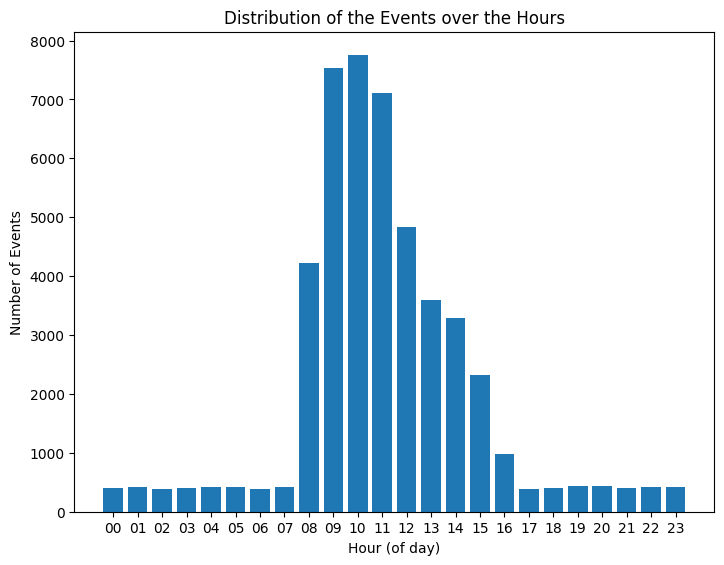

In [21]:
# your code
pm4py.view_events_distribution_graph(event_log, distr_type="hours")

In [29]:
# your code

# find out what the start and end activities are
print('The start activities are:')
display(pm4py.get_start_activities(event_log))
print('The end activities are:')
display(pm4py.get_end_activities(event_log))

The start activities are:


{'Online': 6993, 'App': 3007}

The end activities are:


{'Pay': 3949,
 'Send Repaired': 1292,
 'Send New': 4405,
 'Fill Fraud Report': 354}

In [33]:
# only concider cases that have started
start_log = pm4py.filter_start_activities(event_log, ["Online","App"])
len(start_log)

end_log = pm4py.filter_end_activities(event_log, ['Pay','Send Repaired','Send New','Fill Fraud Report'])
len(end_log)

10000

**Your answer**: *(Briefly describe the differences between the two models in about five sentences here.)*

### b) Discovery and Conformance Checking (9pts)

#### **b(i)** 
Mine a Petri net using Inductive Miner and display it.

In [ ]:
# your code
# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(event_log,noise_threshold=0.8)

# display petri net
pm4py.view_petri_net(net, im, fm, format='png') 

#### **b(ii)** 
Compute the fitness of the discovered Petri net using token-based replay.

*Hint: PM4Py can directly (using the top-level API) compute the number of missing, remaining, consumed, and produced tokens. Based on these, you can, for example, compute the token-based replay fitness.*

In [ ]:
# your code
fitness = pm4py.fitness_token_based_replay(event_log, net, im, fm)
print(fitness)

#### **b(iii)** 
Filter the log to contain only traces where *Register Low* occurs. How many traces does the resulting log `log_low` contain?


In [ ]:
# your code
log_low = pm4py.filter_event_attribute_values(event_log, "concept:name", ['Register Low'], level="case", retain=True)
print(f'Number of traces in filtered log_low: {len(log_low)}')

#### **b(iv)** 
Discover a Petri net for `log_low` and compute its fitness. How does this model differ from the model you discovered in *b(i)*? 

Suppose each of your produced process models is considered a 2-class classifier: provided a trace, it returns "Yes" if and only if the trace can be replayed by the model. Based on this perspective, how would the two process models compare in terms of precision?

In [ ]:
# your code
# The net, initial marking, and final marking
net_low, im_low, fm_low = pm4py.discover_petri_net_inductive(log_low, noise_threshold = 0.8)

# display petri net
pm4py.view_petri_net(net_low, im_low, fm_low, format='png') 

# compute fitness
fitness_low = pm4py.fitness_token_based_replay(log_low, net_low, im_low, fm_low)
print(fitness_low)

**Your answer:** *(Briefly describe the difference between the two models here. About two sentences can be enough.*)

**Your answer**: *(Relate your observations to precision here.)*

### Conformance Diagnostics De-jure Model
The process owner provides you a de-jure model (i.e., a model of the should-be process) and a slightly changed version of the so far considered event log. 

In this task, you will again apply conformance checking by means of token-based replay to provide diagnostics on deviations.

#### **b(v)** 
Load the Petri net *pn_conf.apnml*, the event log *log_conf.xes*, and provide the overall (i.e., model-based) token-based replay fitness score.



In [9]:
import pm4py.objects.petri_net.importer
import pm4py.objects.petri.common

In [12]:
# your code
pn_conf = pm4py.objects.petri_net.importer.variants.pnml.import_net('datasets/pn_conf.apnml')[0]
log_conf = pm4py.read_xes('datasets/log_conf.xes')

parsing log, completed traces ::   0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
im_conf = pm4py.objects.petri.common.initial_marking.discover_initial_marking(pn_conf)
fm_conf = pm4py.objects.petri.common.final_marking.discover_final_marking(pn_conf)

In [ ]:
pm4py.evaluation.replay_fitness.variants.token_replay.apply(log_conf, pn_conf, im_conf, fm_conf)

#### **b(vi)** 
To provide additional diagnostics on the deviations, compute the missing, consumed, produced and remaining number of tokens for **each place**. 
To do so, use the following *pm4py* code:
    
    from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
	tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model =
    token_based_replay.apply(log_conf, net_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

After running this line for log `log_conf`, Petri net `net_conf` with initial marking `im_conf` and final marking `fm_conf`, the variable `place_fitness` will contain the token counts for each place and trace. Therefore, you will only need aggregate over the traces.
Print a table of the token counts per place. 


In [ ]:
# your code
from pm4py.algo.conformance.tokenreplay import algorithm as token_based_replay
tbr_results, place_fitness, transition_fitness, notexisting_activities_in_model = token_based_replay.apply(log_conf, pn_conf, im_conf, fm_conf, parameters={"enable_pltr_fitness": True, "disable_variants": True})

In [ ]:
place_fitness_df = pd.DataFrame.from_dict(place_fitness,orient ='index')

In [ ]:
# Print a table of the token counts per place
print(place_fitness_df[['m','r','c','p']])

#### **b(vii)** 
Consider the token counts per place and a few unfitting traces, which deviation(s) do you observe? Describe the deviation and briefly explain how it can be related to the token counts of the individual places. For example, activity *xy* is often missing resulting in a high number of missing tokens in place *p*.  


In [ ]:
# display petri net
pm4py.view_petri_net(pn_conf, im_conf, fm_conf, format='png') 

In [ ]:
# consider a few unfitting traces
n1_dict = place_fitness[list(place_fitness)[0]]

In [ ]:
# few = 123
count = 0
liste = []
for trace in iter(n1_dict['underfed_traces']):
    if count == 123:
        break
    count = count + 1
    # print(count, end='\n')
    liste.append(trace.attributes['concept:name'])
    # print(trace.attributes)
    # for i in range(0,len(trace)):
    #     print(trace[i]['concept:name'])
print(liste)

In [ ]:
tracefilter_log_pos = pm4py.filter_trace_attribute_values(log_conf, "concept:name", liste, retain=True)
# The net, initial marking, and final marking
net, im, fm = pm4py.discover_petri_net_inductive(tracefilter_log_pos)

# display petri net
pm4py.view_petri_net(net, im, fm, format='png') 

In [ ]:
# display petri net for comparision
pm4py.view_petri_net(pn_conf, im_conf, fm_conf, format='png') 

**Your answer:** *(Describe the deviation(s). One sentence can already be enough.)*

**Your answer:** (*Relate the deviation(s) to the token counts of the individual places. Roughly five sentences can be enough for a precise description.*)

### c) Analyzing Fraud (4pts)

#### **c(i)** 
Filter the event log so that it only contains traces where a fraud report is filled (occurrence of `Fill Fraud Report`). For theses traces, create a bar plot showing the number of products of a certain brand involved in the fraud. Describe the resulting plot.

*Hint: Each case is associated with precisely one brand.*


In [ ]:
# your code
log_spec = pm4py.filter_event_attribute_values(event_log, "concept:name", ['Fill Fraud Report'], level="case", retain=True)
dataframe_spec = pm4py.convert_to_dataframe(log_spec)
type(dataframe_spec)

In [ ]:
# based on Hint, keep only one row per CaseId
df_test = dataframe_spec.drop_duplicates(subset=['CaseId'])

# keep only 1 row per product (stays the same though)
df_test_2 = df_test.drop_duplicates(subset=['case:concept:name'])

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df_test_2['Brand'], df_test_2.groupby('Brand')['Brand'].transform('count'), color ='maroon',
        width = 0.4)
 
plt.xlabel("Brands involved in fraud")
plt.ylabel("No. of Products")
plt.show()

In [ ]:
df_test_2.groupby('Brand')['Brand'].transform('count').unique().sum()

**Your answer:** (*Describe the plot in two to three sentences.*) The brands 'PEAR', 'CP' and 'CKP' are contained in traces, that are involved in fraud. Thereby 'PEAR' has 209 different products contained in traces, that are involved in fraud, while for the other two it is below half of it (89 products of 'CP' and 56 products of 'SKP'). All brands together sum up to about 350 different products contained in traces, that are involved in fraud.

#### **c(ii)**  
The plot shows differences between brands. Discuss the result. Consider what you learned in Lecture 11 (association rules). Try to provide additional analysis results to underpin your discussion.

*Hint: A very short additional analysis (i.e., a few lines of code) might already be sufficient.*


In [ ]:
# your code (for a short additional analysis)

**Your answer:** *(Relate your results to Lecture 11, approximately one short paragraph)*